In [1]:
# Importing required libraries & data csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('train.csv')
#df.head(5)

In [2]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [4]:
# Rounding off lattitude & longitude to 4 decimals which corresponds distance of about 10 meters.
df['pickup_latitude']  = df['pickup_latitude'].apply(lambda x:round(x, 4))
df['pickup_longitude']  = df['pickup_longitude'].apply(lambda x:round(x, 4))
df['dropoff_latitude']  = df['dropoff_latitude'].apply(lambda x:round(x, 4))
df['dropoff_longitude']  = df['dropoff_longitude'].apply(lambda x:round(x, 4))

# Converting 'store_and_fwd_flag' to numerical
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].apply(lambda x:0 if x=='N' else 1)

# Getting trip distance, average speed, pick-up hour & pick-up month.

def tr_dst(x):
    from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
    R = 6373.0

    lat1 = radians(x[6])
    lon1 = radians(x[5])
    lat2 = radians(x[8])
    lon2 = radians(x[7])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return (R * c)

df['dist'] = df.apply(tr_dst, axis=1)


# Getting average speed
def spd_f(x):
    return (3600*(x['dist']/x['trip_duration']))
df['Avg_Speed'] = df.apply(spd_f, axis=1)

# Getting pick-up hour
df['pickup_hour'] = df['pickup_datetime'].apply(lambda x: int(str(x.split()[1]).split(':')[0]))

# Getting pick-up month
df['pickup_month'] = df['pickup_datetime'].apply(lambda x: int(str(x.split()[0]).split('-')[1]))

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dayofweek'] = df['pickup_datetime'].dt.dayofweek
#df['pickup_minutes'] = df['pickup_datetime'].dt.minute
#df['Time_slot'] = (df['pickup_hour']*4)+(df['pickup_minutes']//15)+1

df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist,Avg_Speed,pickup_hour,pickup_month,dayofweek
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.9822,40.7679,-73.9646,40.7656,0,455,1.504579,11.904361,17,3,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.9804,40.7386,-73.9995,40.7312,0,663,1.808028,9.817347,0,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.9790,40.7639,-74.0053,40.7101,0,2124,6.381490,10.816086,11,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.0100,40.7200,-74.0123,40.7067,0,429,1.492012,12.520378,19,4,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.9731,40.7932,-73.9729,40.7825,0,435,1.190278,9.850580,13,3,5


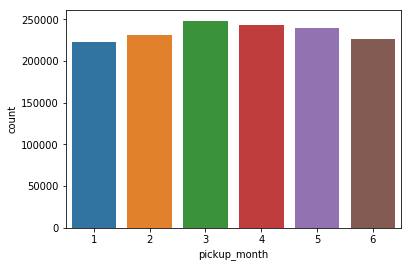

In [19]:
# Checking count according to month
sns.countplot('pickup_month', data=df)
# Conclusion: Number of trips per month ranges from about 225,000 (January)  to 250,000 (March). 

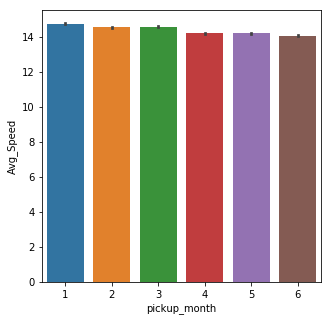

In [20]:
# Checking the average speed for different months

fig, axes = plt.subplots(1, 1, figsize=(5,5))
#axes.set_ylim([80, 105])
sns.barplot('pickup_month', 'Avg_Speed', data=df, estimator=np.mean, ax=axes)
#Conclusion: Season/time of year doesn't affect average speed for trips

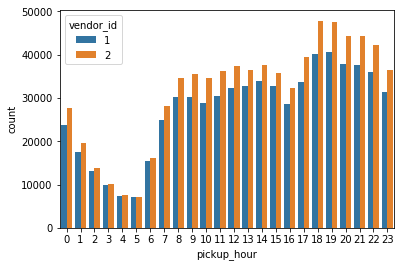

In [21]:
# Checking count according to hour
sns.countplot('pickup_hour', data=df, hue='vendor_id')
# Conclusion: The busiest hours are between 18:00 & 23:00. Between 3:00 to 6:00, the trips are the least.

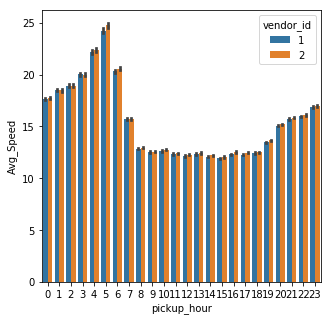

In [22]:
# Checking the average speed according to hour

fig, axes = plt.subplots(1, 1, figsize=(5,5))
#axes.set_ylim([80, 105])
sns.barplot('pickup_hour', 'Avg_Speed', data=df, estimator=np.mean, ax=axes, hue = 'vendor_id')

# Conclusion: Maximum speed is between 3:00 to 7:00 (due to less traffic probably!). Trips are slowest between 8:00 & 19:00

In [5]:
# Checking Avg_Speed more than 100km/hour # len(df[df['Avg_Speed']>100])/len(df['Avg_Speed']) # 0.000033% trips have Avg_Speed more than 100km/hour
# Checking Avg_Speed less than 1km/hour # len(df[df['Avg_Speed']<1])/len(df['Avg_Speed']) # 0.5% trips have Avg_Speed less than 1km/hour

# Dropping data with Avg_Speed more than 100km/hour & less than 1km/hour
df = df[(df['Avg_Speed']<100) & (df['Avg_Speed']>1)]

# Checking trip duration more than 1 hour #len(df[df['trip_duration']>3600])/len(df['trip_duration']) # 0.8% trips are more than 1 hour

# Checking trip duration less than 2 minute #len(df[df['trip_duration']<120])/len(df['trip_duration']) # 1.9% trips are less than 2 minute

# Dropping data with trip duration more than 1 hour & less than 2 minutes.
df = df[(df['trip_duration']<3600) & (df['trip_duration']>120)]

# Dropping trips with distance less than 50 meters
df = df[df['dist']>.05]

In [6]:
df.info()
#1458644 entries (before) # 1410722 entries (after)   # Approx 3.3% rows are dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410722 entries, 0 to 1458643
Data columns (total 16 columns):
id                    1410722 non-null object
vendor_id             1410722 non-null int64
pickup_datetime       1410722 non-null datetime64[ns]
dropoff_datetime      1410722 non-null object
passenger_count       1410722 non-null int64
pickup_longitude      1410722 non-null float64
pickup_latitude       1410722 non-null float64
dropoff_longitude     1410722 non-null float64
dropoff_latitude      1410722 non-null float64
store_and_fwd_flag    1410722 non-null int64
trip_duration         1410722 non-null int64
dist                  1410722 non-null float64
Avg_Speed             1410722 non-null float64
pickup_hour           1410722 non-null int64
pickup_month          1410722 non-null int64
dayofweek             1410722 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(7), object(2)
memory usage: 183.0+ MB


In [7]:
df_clean = df.drop(['id','pickup_datetime', 'dropoff_datetime', 'Avg_Speed'], axis=1)
df_clean.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist,pickup_hour,pickup_month,dayofweek
0,2,1,-73.9822,40.7679,-73.9646,40.7656,0,455,1.504579,17,3,0
1,1,1,-73.9804,40.7386,-73.9995,40.7312,0,663,1.808028,0,6,6
2,2,1,-73.9790,40.7639,-74.0053,40.7101,0,2124,6.381490,11,1,1
3,2,1,-74.0100,40.7200,-74.0123,40.7067,0,429,1.492012,19,4,2
4,2,1,-73.9731,40.7932,-73.9729,40.7825,0,435,1.190278,13,3,5


In [8]:
# get input and target from your data, X is the input, y is the target
y = df_clean['trip_duration'].values # define target 
X = df_clean.drop(['trip_duration','passenger_count'], axis =1)

In [9]:
## Activity 3:  split total data by train, test and validation

from sklearn.model_selection import train_test_split

# split 30% data as test data
train_X,test_X,train_y,test_y = train_test_split(X,y,shuffle=True,random_state=2019,test_size=0.3)
print(train_X.shape,test_X.shape,len(train_y),len(test_y))

(987505, 10) (423217, 10) 987505 423217


In [10]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=40,max_depth=8)

In [11]:
%%time
model.fit(train_X,train_y)

Wall time: 2min 17s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [12]:
pred_y = model.predict(test_X)

In [13]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(test_y,pred_y ))
# 0.3716

0.3716072271290136

In [14]:
test_y[:10]

array([ 285,  352,  697, 1931,  472,  224,  735, 1494,  432, 1067],
      dtype=int64)

In [15]:
pred_y[:10]

array([ 338.40411563,  469.34420453,  566.28512461, 2190.03830428,
        431.61603503,  506.90677162,  638.13197809, 1731.59770921,
        274.63397801, 1205.40939153])

In [17]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X, y = y, cv = 5)
#accuracies.mean()
#accuracies.std()

In [18]:
print(f'The accuracies are: {accuracies}')
print(f'The std deviation for accuracies are: {accuracies.std()}')
print(f'The average of accuracies are: {accuracies.mean()}')

The accuracies are: [0.72339418 0.72319598 0.72507849 0.72612441 0.72631671]
The std deviation for accuracies are: 0.0013174843738094765
The average of accuracies are: 0.7248219536778395
